<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ID" data-toc-modified-id="ID-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ID</a></span><ul class="toc-item"><li><span><a href="#ID-Duplicates-Conclusion" data-toc-modified-id="ID-Duplicates-Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>ID Duplicates Conclusion</a></span></li></ul></li><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Waterfront</a></span><ul class="toc-item"><li><span><a href="#Pandas-isna()-vs-isnull()---accomplish-same-thing" data-toc-modified-id="Pandas-isna()-vs-isnull()---accomplish-same-thing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pandas isna() vs isnull() - accomplish same thing</a></span></li><li><span><a href="#Drop-null-values" data-toc-modified-id="Drop-null-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Drop null values</a></span></li></ul></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>sqft_basement</a></span><ul class="toc-item"><li><span><a href="#Result" data-toc-modified-id="Result-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Result</a></span></li><li><span><a href="#Column-for-basement/no_basement-using-Numpy.where()" data-toc-modified-id="Column-for-basement/no_basement-using-Numpy.where()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Column for basement/no_basement using Numpy.where()</a></span></li><li><span><a href="#Tiers-of-basement-size-using-Numpy.select()" data-toc-modified-id="Tiers-of-basement-size-using-Numpy.select()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tiers of basement size using Numpy.select()</a></span></li><li><span><a href="#NOTE:-the-dataframe-was-not-updated-to-show-basement-tiers-or-true/false,-only-a-temporary-dataframe-was-used." data-toc-modified-id="NOTE:-the-dataframe-was-not-updated-to-show-basement-tiers-or-true/false,-only-a-temporary-dataframe-was-used.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>NOTE: the dataframe was not updated to show basement tiers or true/false, only a temporary dataframe was used.</a></span></li></ul></li><li><span><a href="#Floors" data-toc-modified-id="Floors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Floors</a></span><ul class="toc-item"><li><span><a href="#Half-floors" data-toc-modified-id="Half-floors-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Half floors</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Yr_renovated" data-toc-modified-id="Yr_renovated-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Yr_renovated</a></span><ul class="toc-item"><li><span><a href="#Nulls-get-bundled-with-values" data-toc-modified-id="Nulls-get-bundled-with-values-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Nulls get bundled with values</a></span></li><li><span><a href="#The-3842-nulls-get-switched-to-'not-0'" data-toc-modified-id="The-3842-nulls-get-switched-to-'not-0'-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The 3842 nulls get switched to 'not 0'</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Bedrooms-and-Bathrooms" data-toc-modified-id="Bedrooms-and-Bathrooms-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Bedrooms and Bathrooms</a></span><ul class="toc-item"><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></li><li><span><a href="#Zipcodes" data-toc-modified-id="Zipcodes-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Zipcodes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Working-with-the-dict-created-using-no-index" data-toc-modified-id="Working-with-the-dict-created-using-no-index-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>Working with the dict created using no index</a></span></li><li><span><a href="#Changing-value-in-lat-to-the-mean-for-the-zip" data-toc-modified-id="Changing-value-in-lat-to-the-mean-for-the-zip-7.0.2"><span class="toc-item-num">7.0.2&nbsp;&nbsp;</span>Changing value in lat to the mean for the zip</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

from sklearn import datasets

In [2]:
# %store -r kc_df

In [3]:
# df = kc_df.copy()

In [4]:
df = pd.read_csv("kc_house_data.csv")

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# ID
Duplicates?

In [7]:
# Duplicate ids, but are they truly the same event?

print("There are {} duplicated ids in this dataset.".format(df.id.duplicated().sum()))

There are 177 duplicated ids in this dataset.


In [8]:
duplicate_id = df[df.id.duplicated(keep=False)]
duplicate_date = df[df.date.duplicated(keep=False)]

# From my capstone project
# duplicates.sort_values(by=['Coffee Name']).head()
# df.drop_duplicates(inplace=True)

temp = df[['id','date']]
duplicates = temp[temp.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [id, date]
Index: []


## ID Duplicates Conclusion
I believe that there aren't any duplicate entries, just houses that were sold/resold 

# Waterfront

In [9]:
# .value_counts() excludes null
print("Value counts for waterfront: \n{}".format(df.waterfront.value_counts()))
print("\nTotal waterfront values: {}".format(len(df.waterfront)))

Value counts for waterfront: 
0.0    19075
1.0      146
Name: waterfront, dtype: int64

Total waterfront values: 21597


In [10]:
# the number of null values, they do not show up in value_counts
21597-19075-146

2376

In [11]:
2376/21597 * 100

11.00152798999861

## Pandas isna() vs isnull() - accomplish same thing

In [12]:
# pd.to_numeric(df.waterfront, errors="coerce", inplace=True)

In [13]:
print("Null waterfront values: {}".format(df.waterfront.isna().sum()))
print(df.waterfront.isna().sum() / len(df.waterfront)) #11% of waterfront data missing

Null waterfront values: 2376
0.11001527989998611


In [14]:
# one .sum() gives the breakout of nulls, a double .sum() gives the total of whole dataframe
df.isna().sum().sum()

6281

In [15]:
df.waterfront.isnull().sum()

2376

## Drop null values
When I tried drop the null values using:
df.waterfront.dropna(axis=0, inplace=True)
it seemed to work.  There were no errors.  When I checked the null values in the column the answer as 0.  However, when I checked the value of waterfront in row 13254 there was a Nan!

In [16]:
# THIS DOES NOT WORK
# df.waterfront.dropna(axis=0,inplace=True)

# RESULTS
# df.waterfront.isna().sum()
# 0

# df.waterfront.isnull().sum()
# 0

# df.waterfront.value_counts().nunique()
# 2

# df.info()
# still only 19221 values 
# what are the other ones?

In [17]:
# THIS IS RIGHT AND WORKS, but 11% of values lost
# df = df.dropna(axis=0, subset=['waterfront'])

In [18]:
# Will fill nulls instead in the ratio of waterfront/non-waterfront
df['est_waterfront'] = df['waterfront'].fillna(pd.Series(np.random.choice([999, 0], 
                                                      p=[146/19221, 1-(146/19221)], size=len(df))))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        19221 non-null float64
view              21534 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null object
yr_built          21597 non-null int64
yr_renovated      17755 non-null float64
zipcode           21597 non-null int64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
est_waterfront    21597 non-null float64
dtypes: float

# sqft_basement

In [20]:
df.sqft_basement.value_counts(sort=True)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
2310.0        1
2130.0        1
2190.0        1
2180.0        1
1770.0        1
2350.0        1
861.0         1
266.0         1
2730.0        1
506.0         1
1920.0        1
1913.0        1
508.0         1
2810.0        1
935.0         1
556.0         1
1548.0        1
915.0         1
20.0          1
2400.0        1
946.0         1
295.0         1
1245.0        1
666.0         1
248.0         1
172.0         1
143.0         1
704.0         1
1852.0        1
2850.0        1
Name: sqft_basement, Len

In [21]:
df.sqft_basement.min()

'0.0'

In [22]:
df.sqft_basement.max()

'?'

In [23]:
df.sqft_basement.isna().sum()

0

In [24]:
# About half of the houses have no basement.

df.sqft_basement.value_counts().sort_values(ascending=False)

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
276.0         1
1281.0        1
1930.0        1
784.0         1
1990.0        1
3500.0        1
1816.0        1
792.0         1
2120.0        1
4130.0        1
2360.0        1
2390.0        1
4820.0        1
1798.0        1
3260.0        1
207.0         1
65.0          1
3480.0        1
906.0         1
1275.0        1
516.0         1
374.0         1
518.0         1
1248.0        1
2500.0        1
2570.0        1
768.0         1
176.0         1
2050.0        1
2850.0        1
Name: sqft_basement, Len

In [25]:
# sqft_living = sqft_above + sqft_basement, is this true
temp = df[['sqft_living','sqft_above','sqft_basement']]

In [26]:
temp.head(3)

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0


In [27]:
temp.sqft_living.isna().sum()

0

In [28]:
temp.sqft_above.isna().sum()

0

In [29]:
temp.sqft_basement.isna().sum()

0

In [30]:
# This is a check of above's value

len(temp[temp['sqft_basement'] == '?'])

454

In [31]:
# create a new column calc_below and compare it to sqft_basement for the ? values
temp['calc_basement'] = temp['sqft_living'] - temp['sqft_above']

In [32]:
temp.head(8)

,sqft_living,sqft_above,sqft_basement,calc_basement
0,1180,1180,0.0,0
1,2570,2170,400.0,400
2,770,770,0.0,0
3,1960,1050,910.0,910
4,1680,1680,0.0,0
5,5420,3890,1530.0,1530
6,1715,1715,?,0
7,1060,1060,0.0,0


In [33]:
temp[temp['sqft_basement'] == '?']

,sqft_living,sqft_above,sqft_basement,calc_basement
6,1715,1715,?,0
18,1200,1200,?,0
42,3595,3595,?,0
79,3450,3450,?,0
112,1540,1160,?,380
115,4380,2780,?,1600
217,2250,2250,?,0
309,3320,2220,?,1100
384,4800,3480,?,1320
508,1540,820,?,720


## Result

It appears on visual inspection, that the sqft_basement values that were ? can be reassigned as the calcualated value of all living space minus the living space above.  

## Column for basement/no_basement using Numpy.where()

In [34]:
temp['has_basement'] = np.where(temp['calc_basement'] == 0, False, True)
temp.head()

,sqft_living,sqft_above,sqft_basement,calc_basement,has_basement
0,1180,1180,0.0,0,False
1,2570,2170,400.0,400,True
2,770,770,0.0,0,False
3,1960,1050,910.0,910,True
4,1680,1680,0.0,0,False


## Tiers of basement size using Numpy.select()

https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/?utm_source=Iterable&utm_medium=email&utm_campaign=newsletter_90

In [35]:
temp.describe()

,sqft_living,sqft_above,calc_basement
count,21597.000000,21597.000000,21597.000000
mean,2080.321850,1788.596842,291.725008
std,918.106125,827.759761,442.667800
min,370.000000,370.000000,0.000000
25%,1430.000000,1190.000000,0.000000
50%,1910.000000,1560.000000,0.000000
75%,2550.000000,2210.000000,560.000000
max,13540.000000,9410.000000,4820.000000


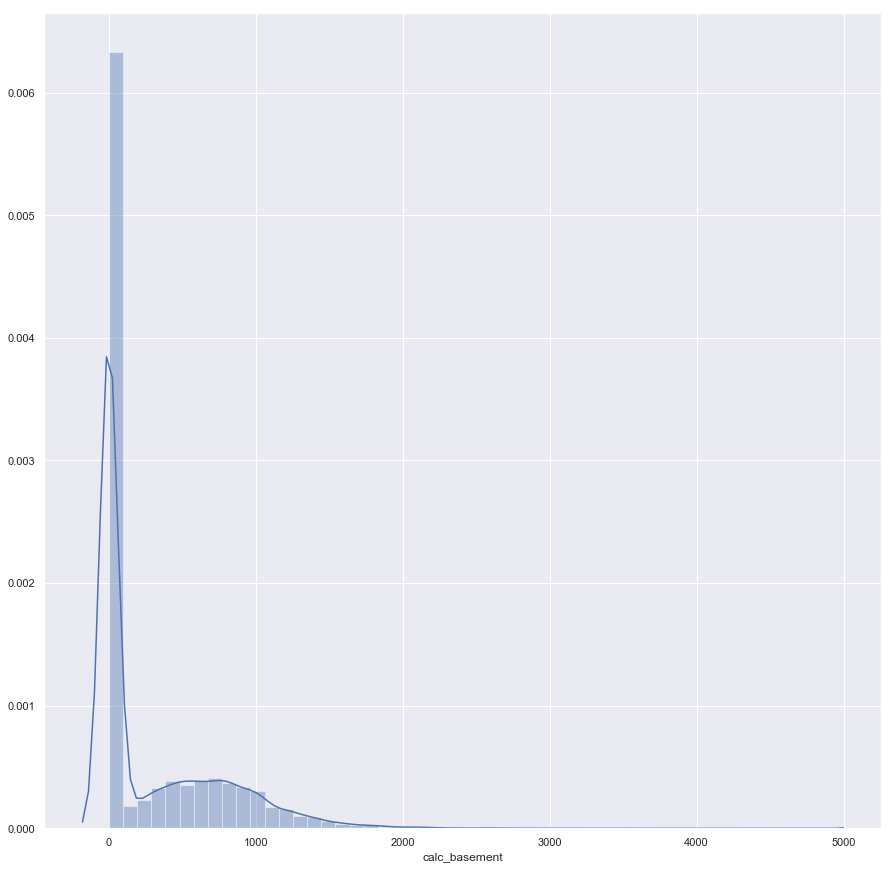

In [36]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(temp['calc_basement'])

In [37]:
conditions = [
    (temp['calc_basement'] == 0),
    (temp['calc_basement'] > 0) & (temp['calc_basement'] <= 300),
    (temp['calc_basement'] > 300) & (temp['calc_basement'] <= 600),
    (temp['calc_basement'] > 600) & (temp['calc_basement'] <= 1000),
    (temp['calc_basement'] > 1000) & (temp['calc_basement'] <= 5000),
    ]

In [38]:
values = ['level_1', 'level_2', 'level_3', 'level_4','level_5']

In [39]:
temp['basement_size'] = np.select(conditions, values)

In [40]:
temp.head()

,sqft_living,sqft_above,sqft_basement,calc_basement,has_basement,basement_size
0,1180,1180,0.0,0,False,level_1
1,2570,2170,400.0,400,True,level_3
2,770,770,0.0,0,False,level_1
3,1960,1050,910.0,910,True,level_4
4,1680,1680,0.0,0,False,level_1


In [41]:
temp.basement_size.value_counts()

level_1    13110
level_4     3108
level_3     2357
level_5     1866
level_2     1156
Name: basement_size, dtype: int64

## NOTE: the dataframe was not updated to show basement tiers or true/false, only a temporary dataframe was used. 

At this point, I'll add the calc_basement column to the dataframe.

In [42]:
df['calc_basement'] = df['sqft_living'] - df['sqft_above']

# Floors

In [43]:
# Sorts by value
df.floors.value_counts(sort=True)

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [44]:
# Sort by index
df.floors.value_counts().sort_index()

1.0    10673
1.5     1910
2.0     8235
2.5      161
3.0      611
3.5        7
Name: floors, dtype: int64

## Half floors
A house that is 1.5 has the master bedroom on the first floor and the other bedrooms on the second floor.  A 2.5 story house has a steep roof line and dormers.  Presumably a 3.5 story house has three floors and then a steep roof and dormer.

In [45]:
df.floors.head(20)

0     1.0
1     2.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     1.0
8     1.0
9     2.0
10    1.0
11    1.0
12    1.5
13    1.0
14    1.5
15    2.0
16    2.0
17    1.5
18    1.0
19    1.0
Name: floors, dtype: float64

In [46]:
# Goal to combine floors
# if floor is 1.5 rename to 2
# if floor is 2.5 or 3.5 rename to 3

df.loc[df['floors'] == 1.5, 'floors'] = 2
df.loc[df['floors'] == 2.5, 'floors'] = 3
df.loc[df['floors'] == 3.5, 'floors'] = 3

In [47]:
df.floors.value_counts()

1.0    10673
2.0    10145
3.0      779
Name: floors, dtype: int64

## Result
I could have reused numpy.select() to change the values of 1.5, 2.5 and 3.5, but wanted to use a new technique.

# Yr_renovated

In [48]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [49]:
# null values: 3842
df.yr_renovated.isna().sum()

3842

In [50]:
df.yr_renovated.value_counts().nunique()

23

In [51]:
# year and null: 4586
df[df['yr_renovated'] != 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,0
12,114101516,5/28/2014,310000.0,3,1.00,1430,19901,2.0,0.0,0.0,...,0.0,1927,NaN,98028,47.7558,-122.229,1780,12697,0.0,0
23,8091400200,5/16/2014,252700.0,2,1.50,1070,9643,1.0,NaN,0.0,...,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386,0.0,0
26,1794500383,6/26/2014,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573,0.0,700
28,5101402488,6/24/2014,438000.0,3,1.75,1520,6380,1.0,0.0,0.0,...,730.0,1948,NaN,98115,47.6950,-122.304,1520,6235,0.0,730
35,9547205180,6/13/2014,696000.0,3,2.50,2300,3060,2.0,0.0,0.0,...,790.0,1930,2002.0,98115,47.6827,-122.310,1590,3264,0.0,790
40,5547700270,7/15/2014,625000.0,4,2.50,2570,5520,2.0,NaN,0.0,...,0.0,2000,NaN,98074,47.6145,-122.027,2470,5669,0.0,0
45,8035350320,7/18/2014,488000.0,3,2.50,3160,13603,2.0,0.0,0.0,...,0.0,2003,NaN,98019,47.7443,-121.977,3050,9232,0.0,0
52,7518505990,12/31/2014,600000.0,3,1.75,1410,4080,1.0,0.0,0.0,...,410.0,1950,NaN,98117,47.6808,-122.384,1410,4080,0.0,410


In [52]:
#null and year renovated + no renovation = total
4586+17011

21597

In [53]:
# total - no renovation - null = number of renovations
21597-17011-3842

744

In [54]:
# 17% of values are null, too much to drop
3842/21597

0.17789507802009538

In [55]:
# renovation to no-renovation ratio
744/17011

0.04373640585503498

## Nulls get bundled with values

In [56]:
# create new column, renovation, true or false value
# what will happen with nulls? 

# df['renovation'] = np.where(df['yr_renovated'] == 0, False, True)

In [57]:
# df.renovation.value_counts()
# Results:
# False 17011
# True   4586

In [58]:
# df['renovation'] = np.where(df['yr_renovated'] != 0, True, False)

In [59]:
# same result as above
# df.renovation.value_counts()

## The 3842 nulls get switched to 'not 0'

In [60]:
df['renovation'] = df['yr_renovated'].fillna(pd.Series(np.random.choice([999, 0], 
                                                      p=[744/17011, 1-(744/17011)], size=len(df))))

In [61]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,400,1991.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,0,999.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0.0,910,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,0,0.0
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,0.0,1530,0.0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,0.0,0,0.0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,1963,0.0,98198,47.4095,-122.315,1650,9711,0.0,0,0.0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1960,0.0,98146,47.5123,-122.337,1780,8113,0.0,730,0.0
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,2003,0.0,98038,47.3684,-122.031,2390,7570,0.0,0,0.0


In [62]:
df.renovation.value_counts()

0.0       20675
999.0       178
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1984.0       16
1998.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1997.0       12
1993.0       12
          ...  
1964.0        5
1975.0        5
1981.0        4
1973.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1959.0        1
1946.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1953.0        1
1948.0        1
1934.0        1
1976.0        1
1944.0        1
Name: renovation, Length

In [63]:
df.renovation.isna().sum()

0

In [64]:
round(0.96*3842 + 17011)

20699

In [65]:
# Removed nulls in the ratio of renovation/non-renovation, now change the column to bool
df['renovation'] = np.where(df['renovation'] == 0, False, True)

In [66]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,400,True
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,0.0,0,True


In [67]:
print(df[['id', 'yr_renovated', 'renovation']].head(6)) 

           id  yr_renovated  renovation
0  7129300520           0.0       False
1  6414100192        1991.0        True
2  5631500400           NaN        True
3  2487200875           0.0       False
4  1954400510           0.0       False
5  7237550310           0.0       False


In [68]:
df.renovation.value_counts()

False    20675
True       922
Name: renovation, dtype: int64

## Result
A new column was created, the null values where filled in the correct ratio and then the column values where converted to a bool.

https://stackoverflow.com/questions/38934140/fill-missing-values-by-a-ratio-of-other-values-in-pandas

# Bedrooms and Bathrooms

In [69]:
print("max",df.bedrooms.max())
print('min',df.bedrooms.min())
print("null", df.bedrooms.isna().sum())

max 33
min 1
null 0


In [70]:
# Fix the 33 bedrooms

In [71]:
bed_outlier = df.loc[df['bedrooms'] > 10]
bath_outlier = df.loc[df['bathrooms'] > 7]
print("Bedroom outliers: ", bed_outlier)
print("Bathroom outliers: ", bath_outlier)

Bedroom outliers:                 id       date     price  bedrooms  bathrooms  sqft_living  \
8748   1773100755  8/21/2014  520000.0        11       3.00         3000   
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view     ...      yr_built  yr_renovated  \
8748       4960     2.0         0.0   0.0     ...          1918        1999.0   
15856      6000     1.0         0.0   0.0     ...          1947           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  est_waterfront  \
8748     98106  47.5560 -122.363           1420        4960             0.0   
15856    98103  47.6878 -122.331           1330        4700             0.0   

       calc_basement  renovation  
8748             600        True  
15856            580       False  

[2 rows x 24 columns]
Bathroom outliers:                 id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0    

In [72]:
df["bedrooms"].replace({33: 3}, inplace=True)

In [73]:
df.bedrooms.median()

3.0

## Conclusions
Although 11 seems like a large number of bedrooms, it may be an old Victorian.  Additionally, some houses had a large number of bathrooms and that may be intentional for rental income.  Therefore, the only change made was to change the house with 33 bedrooms to 3.  Another option would have been to replace with the median number of bedrooms, which happens to be 3 too.

# Zipcodes

In [74]:
# 70 zipcodes
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98199    317
98004    317
        ... 
98112    269
98168    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [75]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

Text(0.5, 0, 'Mean prices of homes')

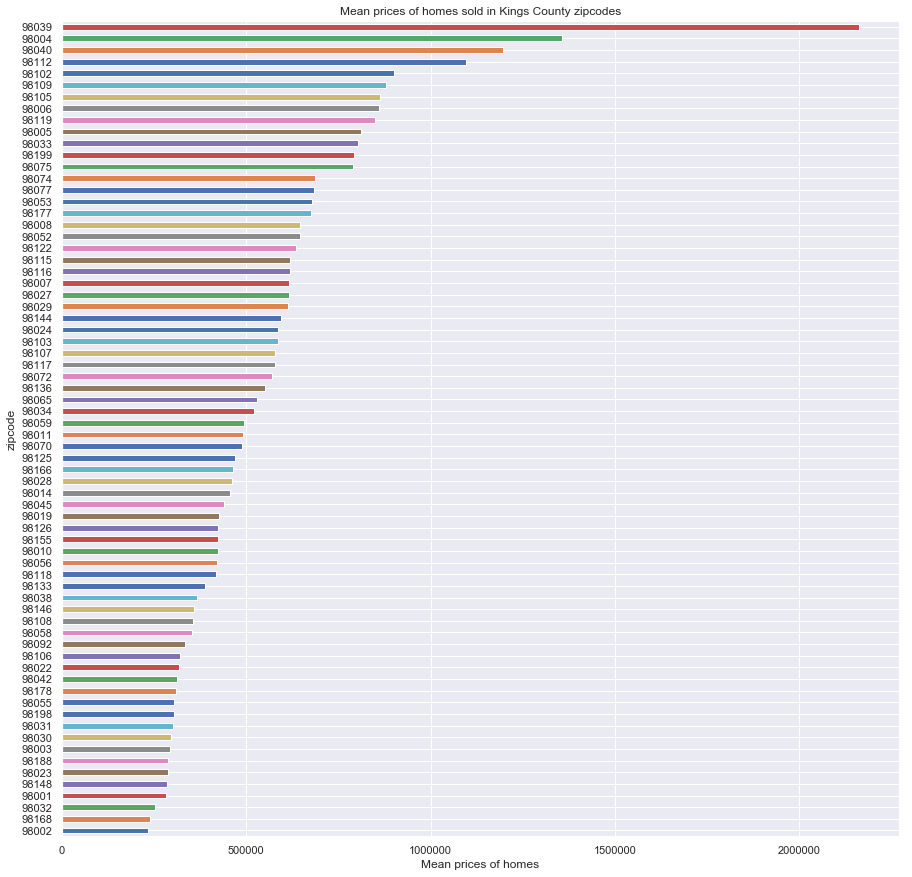

In [76]:
df.groupby(['zipcode'])['price'].mean().sort_values().plot(kind='barh', figsize=(15,15))
plt.title('Mean prices of homes sold in Kings County zipcodes')
plt.xlabel("Mean prices of homes")


In [77]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement,renovation
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,False
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,0.0,400,True


In [78]:
df[df['zipcode'] == 98039]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement,renovation
2972,3625049014,8/29/2014,2950000.0,4,3.50,4860,23885,2.0,0.0,0.0,...,1996,0.0,98039,47.6172,-122.230,3580,16054,0.0,0,False
3757,2540700110,2/12/2015,1910000.0,4,3.50,4210,18564,2.0,0.0,0.0,...,2001,0.0,98039,47.6206,-122.225,3520,18564,0.0,0,False
4073,3262300940,11/7/2014,875000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,NaN,98039,47.6328,-122.236,1910,8119,0.0,0,False
4074,3262300940,2/10/2015,940000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,NaN,98039,47.6328,-122.236,1910,8119,0.0,0,False
4145,6447300265,10/14/2014,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,...,2008,0.0,98039,47.6151,-122.224,3140,15996,0.0,1320,False
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,2001,NaN,98039,47.6289,-122.233,3560,24345,0.0,3000,False
4787,2210500019,3/24/2015,937500.0,3,1.00,1320,8500,1.0,0.0,0.0,...,1954,NaN,98039,47.6187,-122.226,2790,10800,0.0,0,False
5173,6447300345,4/6/2015,1160000.0,4,3.00,2680,15438,2.0,0.0,2.0,...,1902,1956.0,98039,47.6109,-122.226,4480,14406,0.0,0,True
5584,6447300225,11/6/2014,1880000.0,3,2.75,2620,17919,1.0,0.0,1.0,...,1949,0.0,98039,47.6144,-122.228,3400,14400,0.0,0,False
5874,2525049148,10/7/2014,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,2014,0.0,98039,47.6209,-122.237,3160,17825,0.0,0,False


In [79]:
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

In [80]:
# Create a list of the unique zipcodes
zips = list(df.zipcode.unique())

In [81]:
print(zips)

[98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]


In [82]:
# I thought I was creating a dict, but it was a df 
df_zip_lat = df.groupby('zipcode', as_index=False)['lat'].mean()

In [83]:
df_zip_lat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 2 columns):
zipcode    70 non-null int64
lat        70 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [84]:
df_zip_lat.head(2)

,zipcode,lat
0,98001,47.309106
1,98002,47.308780


In [85]:
# create the df without the index by changing the as_index
no_index_zip_lat = df.groupby('zipcode', as_index=True)['lat'].mean()

In [86]:
print(no_index_zip_lat.head(2))

zipcode
98001    47.309106
98002    47.308780
Name: lat, dtype: float64


In [87]:
print(df_zip_lat[0:5])

   zipcode        lat
0    98001  47.309106
1    98002  47.308780
2    98003  47.315741
3    98004  47.616183
4    98005  47.611532


In [88]:
df_zip_lat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 2 columns):
zipcode    70 non-null int64
lat        70 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [89]:
# Convert the df with no index to a dictionary, the zip is the key and the mean lat is the value
# https://stackoverflow.com/questions/18695605/python-pandas-dataframe-to-dictionary

zip_lat_dict = no_index_zip_lat.to_dict()

In [90]:
type(zip_lat_dict)

dict

In [91]:
# It worked!!
print(zip_lat_dict)

{98001: 47.30910554016618, 98002: 47.30877989949747, 98003: 47.3157410714286, 98004: 47.61618328075706, 98005: 47.61153154761904, 98006: 47.558021686747, 98007: 47.61052198581556, 98008: 47.61331166077741, 98010: 47.333210000000015, 98011: 47.75519230769231, 98014: 47.671487903225795, 98019: 47.737095789473706, 98022: 47.211225751072924, 98023: 47.3086224448898, 98024: 47.55876375, 98027: 47.52168713592237, 98028: 47.75513780918729, 98029: 47.55955700934583, 98030: 47.36902656249999, 98031: 47.40376483516485, 98032: 47.37355600000002, 98033: 47.68008819444443, 98034: 47.720687889908326, 98038: 47.37064023769109, 98039: 47.62583999999998, 98040: 47.559846099290766, 98042: 47.365698903107855, 98045: 47.47309454545455, 98052: 47.68053780487807, 98053: 47.68003151364763, 98055: 47.45866604477614, 98056: 47.50965714285714, 98058: 47.44608483516482, 98059: 47.49273611111112, 98065: 47.53176525974022, 98070: 47.41742051282049, 98072: 47.751016483516494, 98074: 47.624084353741495, 98075: 47.58

In [92]:
# If I convert the df with the index,  it was problematic
zip_lat_index_dict = df_zip_lat.to_dict()

In [93]:
type(zip_lat_index_dict)

dict

In [94]:
print(zip_lat_index_dict)

{'zipcode': {0: 98001, 1: 98002, 2: 98003, 3: 98004, 4: 98005, 5: 98006, 6: 98007, 7: 98008, 8: 98010, 9: 98011, 10: 98014, 11: 98019, 12: 98022, 13: 98023, 14: 98024, 15: 98027, 16: 98028, 17: 98029, 18: 98030, 19: 98031, 20: 98032, 21: 98033, 22: 98034, 23: 98038, 24: 98039, 25: 98040, 26: 98042, 27: 98045, 28: 98052, 29: 98053, 30: 98055, 31: 98056, 32: 98058, 33: 98059, 34: 98065, 35: 98070, 36: 98072, 37: 98074, 38: 98075, 39: 98077, 40: 98092, 41: 98102, 42: 98103, 43: 98105, 44: 98106, 45: 98107, 46: 98108, 47: 98109, 48: 98112, 49: 98115, 50: 98116, 51: 98117, 52: 98118, 53: 98119, 54: 98122, 55: 98125, 56: 98126, 57: 98133, 58: 98136, 59: 98144, 60: 98146, 61: 98148, 62: 98155, 63: 98166, 64: 98168, 65: 98177, 66: 98178, 67: 98188, 68: 98198, 69: 98199}, 'lat': {0: 47.30910554016618, 1: 47.30877989949747, 2: 47.3157410714286, 3: 47.61618328075706, 4: 47.61153154761904, 5: 47.558021686747, 6: 47.61052198581556, 7: 47.61331166077741, 8: 47.333210000000015, 9: 47.75519230769231, 

### Working with the dict created using no index

In [104]:
print(zip_lat_dict.get(98039))

47.62583999999998


In [95]:
# A first for me - using .get() method

print(zip_lat_dict.get(98039))
# didn't work if use '98039' because the zipcode is an int, not a string?

# zip_lat_dict.keys()

47.62583999999998


### Changing value in lat to the mean for the zip

In [96]:
# TODO: replace value currently in lat with new value from dict

# https://stackoverflow.com/questions/43367700/python-dataframe-replace-values-using-dictionary-convert-nan-if-not-in-diction
# df["fruit_tag"] = df["fruit_tag"].map(d)

In [97]:
# df['lat'] = df['lat'].map(zip_lat_dict)

# this did not work, it put NaN in the lat column

In [98]:
# df.head(3)

In [99]:
# This didn't work either
# df['lat_mean'] = df['lat'].replace(zip_lat_dict)

In [100]:
# This didn't work
# df['lat_mean'] = df['lat'].map(zip_lat_dict)

In [101]:
# df.info()

In [102]:
df[df['zipcode'] == 98039]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,est_waterfront,calc_basement,renovation
2972,3625049014,8/29/2014,2950000.0,4,3.50,4860,23885,2.0,0.0,0.0,...,1996,0.0,98039,47.6172,-122.230,3580,16054,0.0,0,False
3757,2540700110,2/12/2015,1910000.0,4,3.50,4210,18564,2.0,0.0,0.0,...,2001,0.0,98039,47.6206,-122.225,3520,18564,0.0,0,False
4073,3262300940,11/7/2014,875000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,NaN,98039,47.6328,-122.236,1910,8119,0.0,0,False
4074,3262300940,2/10/2015,940000.0,3,1.00,1220,8119,1.0,0.0,0.0,...,1955,NaN,98039,47.6328,-122.236,1910,8119,0.0,0,False
4145,6447300265,10/14/2014,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,...,2008,0.0,98039,47.6151,-122.224,3140,15996,0.0,1320,False
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,2001,NaN,98039,47.6289,-122.233,3560,24345,0.0,3000,False
4787,2210500019,3/24/2015,937500.0,3,1.00,1320,8500,1.0,0.0,0.0,...,1954,NaN,98039,47.6187,-122.226,2790,10800,0.0,0,False
5173,6447300345,4/6/2015,1160000.0,4,3.00,2680,15438,2.0,0.0,2.0,...,1902,1956.0,98039,47.6109,-122.226,4480,14406,0.0,0,True
5584,6447300225,11/6/2014,1880000.0,3,2.75,2620,17919,1.0,0.0,1.0,...,1949,0.0,98039,47.6144,-122.228,3400,14400,0.0,0,False
5874,2525049148,10/7/2014,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,2014,0.0,98039,47.6209,-122.237,3160,17825,0.0,0,False


In [103]:
def value_changer(df,dictionary):
#     for i,j in dictionary.items():
    for index, row in df.iterrows():
        for i,j in dictionary.items()

SyntaxError: invalid syntax (<ipython-input-103-990d32769898>, line 4)

In [ ]:
# print(zip_lat_dict)

In [ ]:
value_changer(df, zip_lat_dict)